In [12]:
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator, AerJob

def execute(circuits, backend=None, shots=1024, **kwargs):
    if backend is None:
        backend = AerSimulator()
        
    # Transpile the circuits for the backend
    transpiled_circuits = transpile(circuits, backend)
    
    # Run the circuits on the backend
    job = backend.run(transpiled_circuits, shots=shots, **kwargs)
    
    return job

backend = Aer.get_backend('statevector_simulator')

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt 
import numpy as np 
from IPython.display import display, clear_output
from math import sqrt 

## The measured qubit implementation

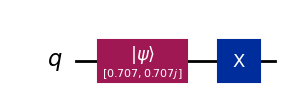

In [13]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Some state vectors
zero = np.array([1, 0])
one = np.array([0, 1])

plus = np.array([1/sqrt(2), 1/sqrt(2)])
minus = np.array([1/sqrt(2), -1/sqrt(2)])

im = np.array([1/sqrt(2), 1j/sqrt(2)])
im_minus = np.array([1/sqrt(2), -1j/sqrt(2)])

# Define initial state 
psi = np.array([1/sqrt(2), 1j/sqrt(2)])
qc.initialize(psi, 0)

# Apply the X gate
qc.x(0)
qc.draw('mpl')

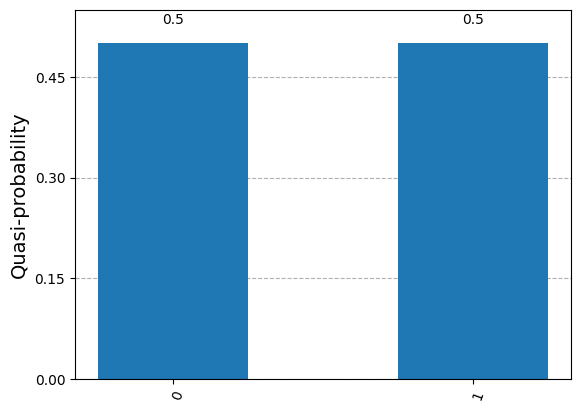

In [14]:
# Execute the simulation, returning the result
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

### Reverse Function

In [16]:
def adjust_weights(state, weights):
    return state[0]*weights[0]+state[1]*weights[1]

print('reversed psi: [{:.2f}, {:.2f}]'.format(
    adjust_weights(psi, [0,1]),
    adjust_weights(psi, [1,0])
))

reversed psi: [0.00+0.71j, 0.71+0.00j]
